In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [4]:
# Step 1: Load dataset
df = pd.read_csv("covid.csv")  # Replace with full path if needed


In [5]:
# Step 2: Drop identifier column
df.drop(columns=['no'], inplace=True)

In [10]:
# Step 3: Encode categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or column == 'diagnosis':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [11]:
# Step 4: Split into features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [12]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
# Step 6: Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Step 7: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [15]:
# Step 8: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [16]:
# Print metrics
print("=== Performance Metrics ===")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")
print(f"ROC AUC  : {roc_auc:.2f}")

=== Performance Metrics ===
Accuracy : 0.60
Precision: 1.00
Recall   : 0.50
F1-Score : 0.67
ROC AUC  : 1.00


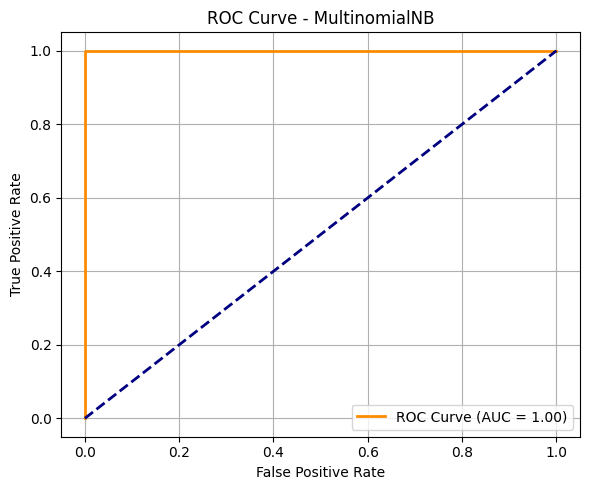

In [17]:

# Step 9: Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MultinomialNB')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

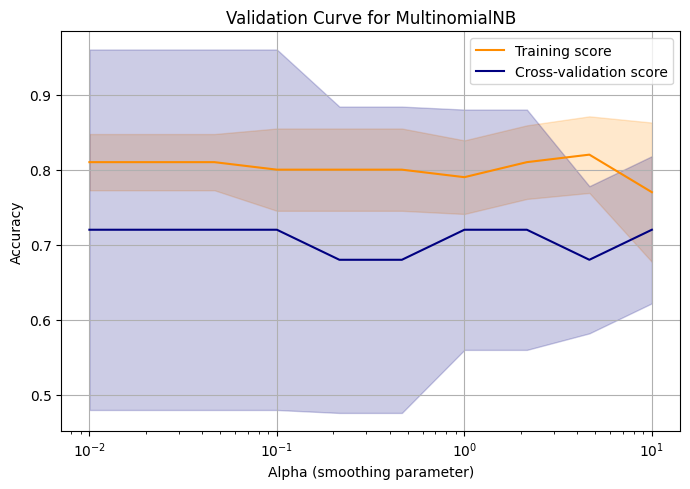

In [18]:
# Step 10: Plot Validation Curve (varying alpha)
param_range = np.logspace(-2, 1, 10)
train_scores, test_scores = validation_curve(
    MultinomialNB(), X, y, param_name="alpha", param_range=param_range,
    scoring="accuracy", cv=5, n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(7, 5))
plt.semilogx(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Validation Curve for MultinomialNB")
plt.xlabel("Alpha (smoothing parameter)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()